In [1]:
#importing the required modules, classes and functions.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
tf.random.set_seed(7)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data into dataframe.
df = pd.read_csv('a10.csv')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
#checking the type of columns in the dataframe.
df.dtypes

date      object
value    float64
dtype: object

In [4]:
#changing the type of the 'date' column from object to datetime64.
df['date'] = df['date'].astype('datetime64')
#after converting the data type of the 'date' column setting the same date
#column as index of the dataset, so as to convert the dataset into a time series.
df.set_index('date', inplace=True)
#displaying the first five rows of the dataframe.
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [5]:
#sorting the row index(axis=0) in ascending order.
df.sort_index(inplace=True)
#displaying the first five rows of the dataframe.
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<AxesSubplot: xlabel='date'>

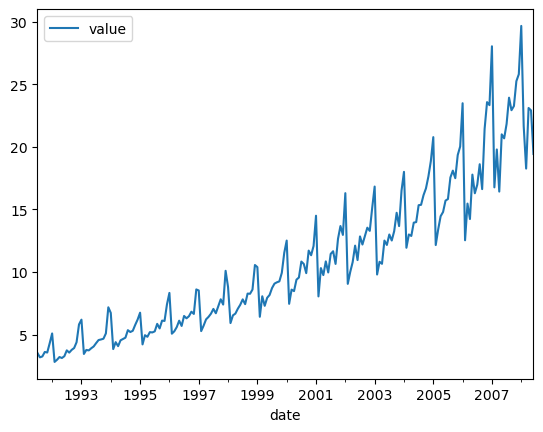

In [6]:
#visualizing the time series data
#so the trend is non-linear as well as seasonality is also non-linear
df.plot()

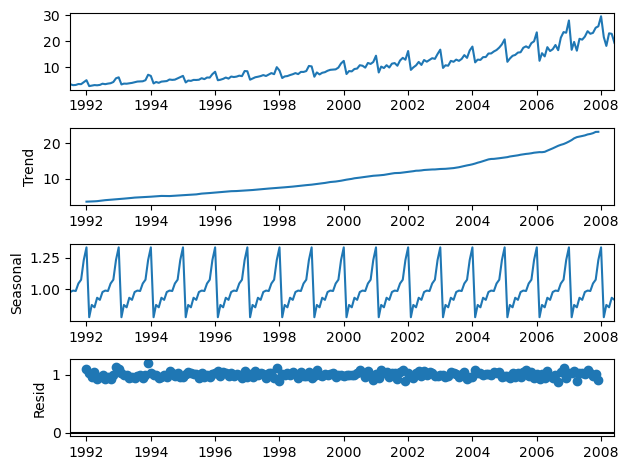

In [7]:
#ETS decomposition- breaking down the time series into four components 
#that is level, trend, seasonality, noise
#since the trend and seasonality is non-linear 
#therefore using multiplicative model.
result = seasonal_decompose(df,model='multiplicative')
result.plot()
plt.show()

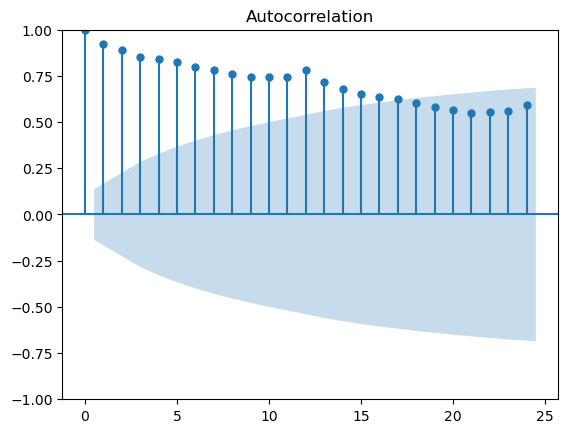

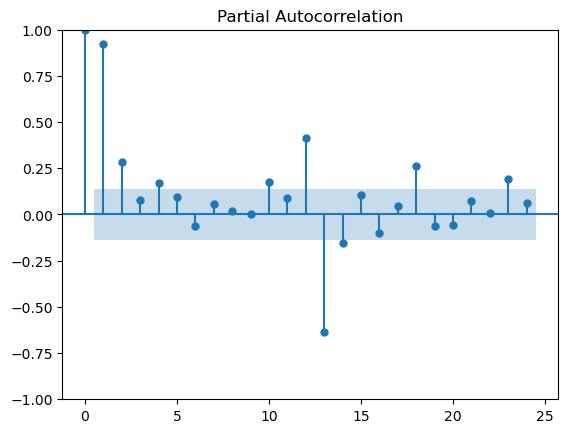

In [8]:
#visualizing acf and pacf
plot_acf(df)
plot_pacf(df)
plt.show()

In [9]:
#using the MinMaxScaler to scale the data in the dataframe.
scaler = MinMaxScaler()
dataset = scaler.fit_transform(df)
dataset[:5]

array([[0.02651951],
       [0.01364468],
       [0.01630121],
       [0.02966325],
       [0.02798233]])

In [10]:
#calculating how much is 70% of the length of the dataset,
#using this we will divide the dataset into train and test.
train_size = int(len(dataset)*0.70)
#dividing the dataset into train and test where
# 70% of the data is used for training and 30% 
#of the data is used for the testing.
train = dataset[:train_size, :]
test = dataset[train_size:, :]

In [11]:
#displaying the first five rows of the training data.
train[:5,:]

array([[0.02651951],
       [0.01364468],
       [0.01630121],
       [0.02966325],
       [0.02798233]])

In [12]:
#displaying the first five rows of the testing data.
test[:5,:]

array([[0.36117321],
       [0.34809679],
       [0.37926291],
       [0.36135768],
       [0.38934123]])

In [13]:
# creating a function that would help in constructing a dataset
#were the input to the model will be the lag values = lookback
#and the output will be the current time value of the variable.
def create_dataset(data, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(data)-lookback):
        x = data[i:(i+lookback), 0]
        y = data[i+lookback, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [14]:
#here we are performing unpacking, were the value returned by the
#fuction is then stored extracted and stored back in the variables.
lookback = 1
trainx, trainy = create_dataset(train, lookback)
testx, testy = create_dataset(test, lookback)

In [15]:
#viewing the first five rows of the data which we will be sending to the model.
#it is the data on which we will be training the model.
trainx[:5,:]

array([[0.02651951],
       [0.01364468],
       [0.01630121],
       [0.02966325],
       [0.02798233]])

In [16]:
#it is the actual o/p value for the input value we have send during training 
#on the train data.
trainy[:5]

array([0.01364468, 0.01630121, 0.02966325, 0.02798233, 0.05556069])

In [17]:
#viewing the first five rows of the data which we will be sending to the model.
#it is the unseen data on which we will test our model.
testx[:5,:]

array([[0.36117321],
       [0.34809679],
       [0.37926291],
       [0.36135768],
       [0.38934123]])

In [18]:
#it is the actual o/p value for the input value we have send during testing 
#on the test data.
testy[:5]

array([0.34809679, 0.37926291, 0.36135768, 0.38934123, 0.44390058])

In [19]:
#checking the shape of the training data
trainx.shape

(141, 1)

In [20]:
#making the shape of the training data on which we will train our model 
#and testing data on which we will test our model, compatible to send to the model.
#Here we will be sending one data point as an input to the model.
trainx = np.reshape(trainx, (trainx.shape[0], 1, 
                             trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, 
                          testx.shape[1]))

#displaying the reshaped training data, on which we will train our model.
trainx

array([[[0.02651951]],

       [[0.01364468]],

       [[0.01630121]],

       [[0.02966325]],

       [[0.02798233]],

       [[0.05556069]],

       [[0.08468321]],

       [[0.        ]],

       [[0.00637935]],

       [[0.01453437]],

       [[0.01165915]],

       [[0.01698282]],

       [[0.03438741]],

       [[0.02771817]],

       [[0.03585295]],

       [[0.04133839]],

       [[0.05854607]],

       [[0.11158048]],

       [[0.12578929]],

       [[0.02369896]],

       [[0.03567065]],

       [[0.03425528]],

       [[0.04062737]],

       [[0.04600107]],

       [[0.05590312]],

       [[0.0650879 ]],

       [[0.06681885]],

       [[0.06902322]],

       [[0.08488829]],

       [[0.16258124]],

       [[0.14587825]],

       [[0.03823932]],

       [[0.05882705]],

       [[0.04695648]],

       [[0.0642857 ]],

       [[0.06819509]],

       [[0.07217975]],

       [[0.09445086]],

       [[0.08900784]],

       [[0.0926277 ]],

       [[0.11020968]],

       [[0.12625

In [21]:
#constructing a LSTM model which is also called as a sequential model as
#it can capture sequential information and it is specialized in capturing the
#long term and short term relationship/memory.
model = Sequential()
model.add(LSTM(8, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', 
             optimizer='adam')

In [22]:
model.fit(trainx, trainy, epochs=100, batch_size=1)

Epoch 1/100
141/141 [==============================] - 1s 1ms/step - loss: 0.0162
Epoch 2/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 4/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 5/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 6/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 7/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 8/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 9/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 10/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 11/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 13/100


In [23]:
#testing on training data
trainpredict = model.predict(trainx)
#testing on testing data
testpredict = model.predict(testx)

#displaying the first five rows of the predicted value, which 
#we got on, testing on training data.
#This predict o/p is a scaled predicted o/p.
trainpredict[:5]

2/2 [==============================] - 0s 2ms/step


array([[0.04307201],
       [0.03151729],
       [0.03390159],
       [0.045893  ],
       [0.04438468]], dtype=float32)

In [24]:
#inverse scaling to get the unscaled output.
trainpredict = scaler.inverse_transform(trainpredict)
trainpredict[:5]

array([[3.9710393],
       [3.6607857],
       [3.724806 ],
       [4.0467854],
       [4.0062857]], dtype=float32)

In [25]:
#inverse scaling to get the unscaled output.
trainy = scaler.inverse_transform([trainy])
testpredict = scaler.inverse_transform(testpredict)
testy = scaler.inverse_transform([testy])

In [26]:
#Since trainy, testy where 1D array so reshaping it, so that the shape 
#of the trainy and trainpredict & testy and testpredict are same for evaluation.
trainy = np.reshape(trainy, (trainy.shape[1], 
                            trainy.shape[0]))
testy = np.reshape(testy, (testy.shape[1], 
                        testy.shape[0]))

In [27]:
#evaluating to check how model performed with the train data.
np.sqrt(mean_squared_error(trainy,
                           trainpredict[:,0]))

1.4947321290886952

In [28]:
#evaluating to check how model performed with the unseen test data.
np.sqrt(mean_squared_error(testy,
                           testpredict[:,0]))

3.6270772259769446

In [29]:
#checking the length of the trainpredict
len(trainpredict)

141

In [30]:
#checking the length of the trainpredict
len(testpredict)

61

In [31]:
trainpredictplot=np.empty_like(dataset)
trainpredictplot[:, :] = np.nan
trainpredictplot[lookback:len(trainpredict)+lookback, :] = trainpredict

In [32]:
testpredictplot = np.empty_like(dataset)
testpredictplot[:,:] = np.nan
testpredictplot[len(trainpredict)+(lookback*2):, :] = testpredict

In [33]:
#setting maximum rows that can be displayed =500
pd.set_option('display.max_rows', 500)
#putting trainpredictplot and testpredictplot in a dataframe for a better visualization.
pd.DataFrame({'trainpredictplot':trainpredictplot.flatten(),'testpredictplot':testpredictplot.flatten()})

,trainpredictplot,testpredictplot
0,NaN,NaN
1,3.971039,NaN
2,3.660786,NaN
3,3.724806,NaN
4,4.046785,NaN
5,4.006286,NaN
6,4.670440,NaN
7,5.370621,NaN
8,3.331952,NaN
9,3.485692,NaN


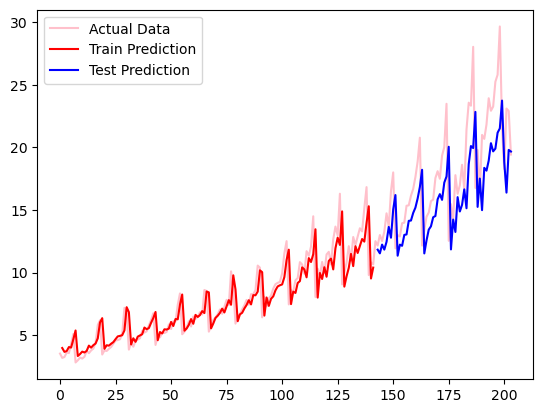

In [34]:
#vizualizing the actual data and the predicted values(train+test) on the same canvas.
plt.plot(scaler.inverse_transform(dataset), 
         label='Actual Data', color = 'pink')
plt.plot(trainpredictplot, label='Train Prediction', color = 'red')
plt.plot(testpredictplot, label='Test Prediction', color = 'blue')
plt.legend()
plt.show()

In [35]:
#at lookback=1, epoch=100, batch_size=1, optimizer=adam, loss=mse, lstm with 8 neuron 
#and a dense layer with one neuron gives the best value.